

```
IMDB二分类问题
使用IMDB数据集，它包含来自互联网电影数据库(IMDB)的50 000条严重两极化的评论。数据集被分为25 000条用于训练的评论与25 000条用于测试的评论，训练集和测试集都包含50% 的正面评论与50% 的负面评论
标签：0代表负面，1代表正面(negative)(positive)
```



In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
train_data.shape

(25000,)

In [4]:
test_data.shape

(25000,)

In [5]:
train_labels.shape

(25000,)

In [6]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [7]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [8]:
# list中最大数值不会超过10000
a = max([max(sequence) for sequence in train_data])
a

9999

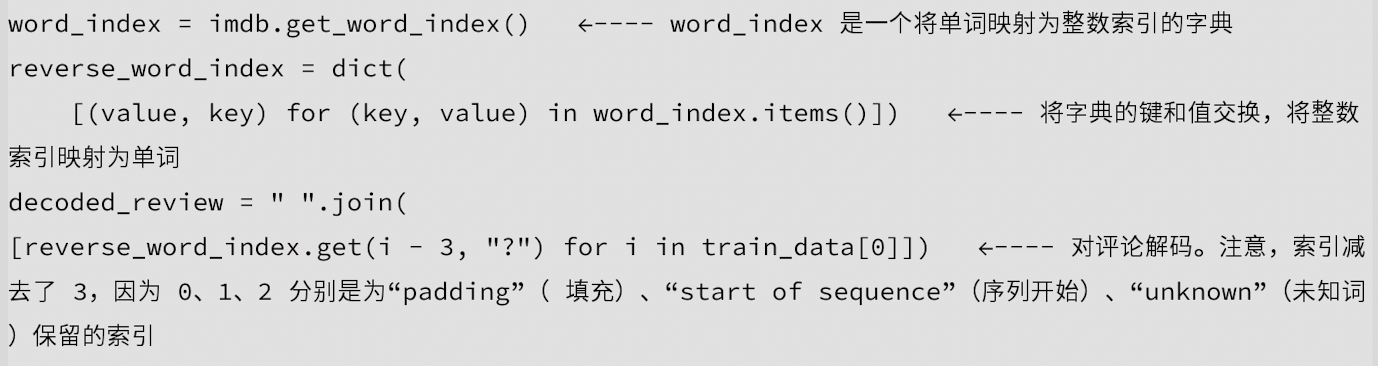

In [9]:
# 将数字解码为英文单词
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [10]:
# multi-hot编码
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences): # 此处sequence是一个数字
        for j in sequence:
            results[i, j] = 1.
    return results

In [11]:
# 向量化
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
# 标签向量化
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [14]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [15]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [16]:
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [17]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [18]:
# 留出验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 7s 198ms/step - loss: 0.5283 - accuracy: 0.7795 - val_loss: 0.3969 - val_accuracy: 0.8602
Epoch 2/4
30/30 [==============================] - 2s 72ms/step - loss: 0.3238 - accuracy: 0.8930 - val_loss: 0.3191 - val_accuracy: 0.8791
Epoch 3/4
30/30 [==============================] - 2s 70ms/step - loss: 0.2403 - accuracy: 0.9190 - val_loss: 0.2943 - val_accuracy: 0.8829
Epoch 4/4
30/30 [==============================] - 2s 67ms/step - loss: 0.1937 - accuracy: 0.9349 - val_loss: 0.2778 - val_accuracy: 0.8860


In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
# 显示loss和accuracy曲线
import matplotlib.pyplot as plt

def show_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

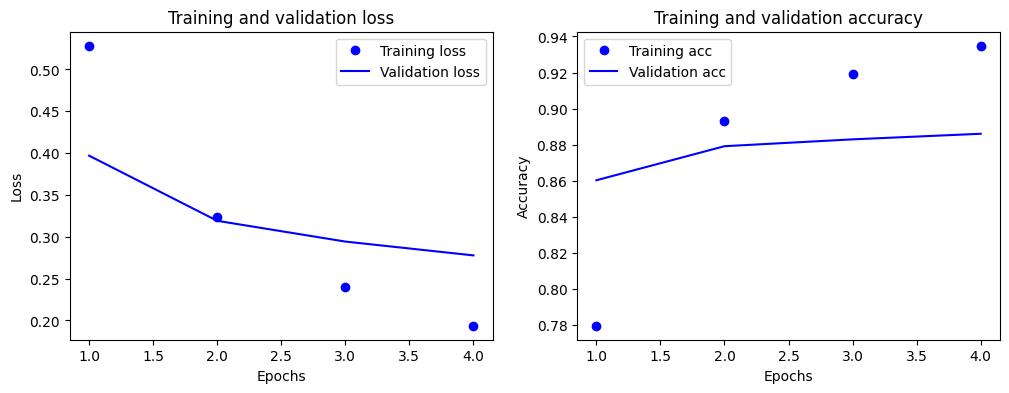

In [22]:
show_history(history)

In [23]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.22826944],
       [0.9995396 ],
       [0.91616035],
       ...,
       [0.10562561],
       [0.14638546],
       [0.63550925]], dtype=float32)